#ML Lab (CS360)
## Assignment 4

### Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import math

np.random.seed(11)

In [ ]:
class GD_LinearRegression():
  def __init__(self, features, learning_rate=1e-4):
    self._features = features
    self._bias = 1
    self._weights = np.random.uniform(size=(features, 1))
    self._learning_rate = learning_rate

  def predict(self, X):
    array_1d = lambda x: np.reshape(x, newshape=(-1))

    if type(X).__name__ == 'list' or type(X).__name__ == 'int' or type(X).__name__ == 'float':
      X = np.array(X)

    if X.ndim == 0:
      if self._features > 1:
        raise (f"Number of features of sample must be {self._features}")
      else:
        return array_1d(np.dot(X, self._weights) + self._bias)

    elif X.ndim == 1:
      if X.shape[0] == self._features or X.ndim == self._features:
        return array_1d(self._bias + np.multiply(X, self._weights))
      else:
        raise Exception(f"Number of features of sample must be {self.features}")

    elif X.ndim == 2:
      if X.shape[1] == self._features:
        return array_1d(np.dot(X, self._weights) + self._bias)
      else:
        raise Exception(f"Shape of input array must be (Number of samples, {self._features})")

    else:
      raise Exception(f"Too many dimensions in input array: {X.ndim}")
      
  def score(self, X, y): # Mean Absolute Error
    y_preds = self.predict(X)
    assert y_preds.shape == np.asarray(y).shape
    return np.mean(np.absolute(np.subtract(y, y_preds)))

  def fit(self, X, y):
    db, dw = self.__derivatives(X, y)
    while self.__update(db, dw, X, y):
      db, dw = self.__derivatives(X, y)

  def error(self, X, y): # half mean squared error
    m = X.shape[0] # number of samples
    squared_error = np.sum(np.square(self.predict(X) - y)) / 2
    return squared_error / m 

  def __derivatives(self, X, y):
    m = X.shape[0] # number of samples

    error = np.reshape(np.subtract(self.predict(X), y), newshape=(-1, 1))

    del_b = np.sum(error * self._bias, axis=0) / m
    del_w = np.reshape(np.sum(error * X, axis=0) / m, newshape=(-1, 1))
  
    return del_b, del_w
  
  def __update(self, db, dw, X, y):
    converged = lambda J, J_new: -1e-8 < J - J_new < 1e-8

    J = self.error(X, y)

    self._bias -= self._learning_rate * db
    self._weights -= self._learning_rate * dw

    J_new = self.error(X, y)

    return not converged(J, J_new)

def generate_dataset(n, target_func):
  X = np.random.uniform(size=(n))
  X.sort()
  y = np.array([target_func(x) for x in X])
  y += np.random.normal(0, 0.3, size=(n))
  return {'X': X, 'y': y}

sin2pix = lambda x: math.sin(2 * math.pi * x)

transform_x = lambda X, n: np.array([[x ** i for i in range(1, n+1)] for x in X])

def plot_error_vs_dimension(store):
  figure = plt.figure(figsize=(30, 15))

  axs = dict()

  for i in range(1, 10):
    axs[f"ax_{i}"] = figure.add_subplot(3, 3, i, xlabel="x - Axis", ylabel="y - Axis", title=f"{i} - Degree Polynomial")
    axs[f"ax_{i}"].plot(X, y, marker='o', c='k', label='Actual Curve')
    axs[f"ax_{i}"].plot(X, store[f"n{i}_predictions"], marker='o', c='r', label='Fitted Curve')
    axs[f"ax_{i}"].legend(loc=1)

def plot_fitted_curves(store):
  figure = plt.figure(figsize=(12, 12))
  ax = figure.add_subplot(111, xlabel='N - degree polynomial', ylabel='Error')

  ax.plot(range(1, 10), store['train_error'], marker='o', c='r', label='Training set error')
  ax.plot(range(1, 10), store['test_error'], marker='o', c='g', label='Test set error')

  leg = ax.legend(loc=2)

def fit_curves():
  store = {
    'train_error': list(),
    'test_error': list()
  }

  for n in range(1, 10): # Looping for 9 different curves
    X_train_transformed = transform_x(X_train, n)

    regressor = GD_LinearRegression(features=n, learning_rate=5e-2)
    regressor.fit(X_train_transformed, y_train)

    store["train_error"].append(regressor.error(X_train_transformed, y_train))

    X_transformed = transform_x(X, n)
    store[f"n{n}_predictions"] = regressor.predict(X_transformed)
  
    X_test_transformed = transform_x(X_test, n)
    store["test_error"].append(regressor.error(X_test_transformed, y_test))
  
  return store

**1. Synthetic data generation and simple curve fitting**

a. Generate a synthetic dataset as follows. The input values  are generated uniformly in range [0, 1], and the corresponding target values are obtained by first computing the corresponding vaues of the function sin(2 \pi x) and then adding a random noise with a Gaussian distribution having standard deviation 0.3. Generate 10 such instances of (xi yi).


In [ ]:
# Dataset of size 10

dataset = generate_dataset(10, sin2pix)
X = dataset['X']
y = dataset['y']

b. Split the dataset into two sets randomly: (i)Tranining Set (80%) (ii) Test Set (20%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

c. Write a code to fit a curve that minimizes squared error cost function using gradient descent (with learning rate 0.05) In your experiment, vary n from 1 to 9. In other words, fit 9 different curves to the training data, and hence estimate the parameters. Use the estimated W to measure squared error on the test set, and name it as test error on test data.

In [ ]:
data_dict_10 = fit_curves()

**2. Visualization of the dataset and the fitted curves**

a. Draw separate plots of the synthetic data points generated in 1(a), and all 9 different curves that you have fit for the given dataset in 1(c)

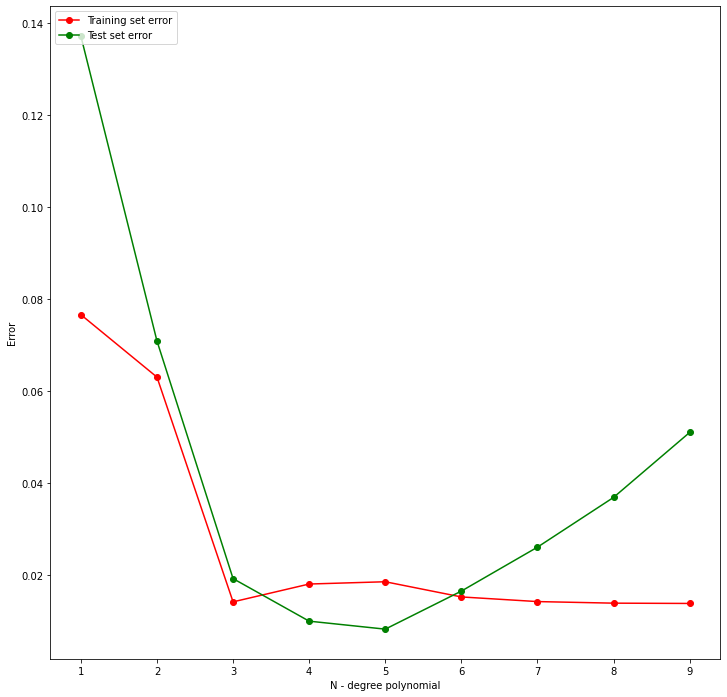

In [ ]:
plot_fitted_curves(data_dict_10)

b. Report squared error on both train and test data for each value of n in the form of a plot where along x-axis, vary n from 1 to 9 and along y-axis plot both train error and test error. Explain which value of n is suitable for the synthetic dataset that you have generated and why.

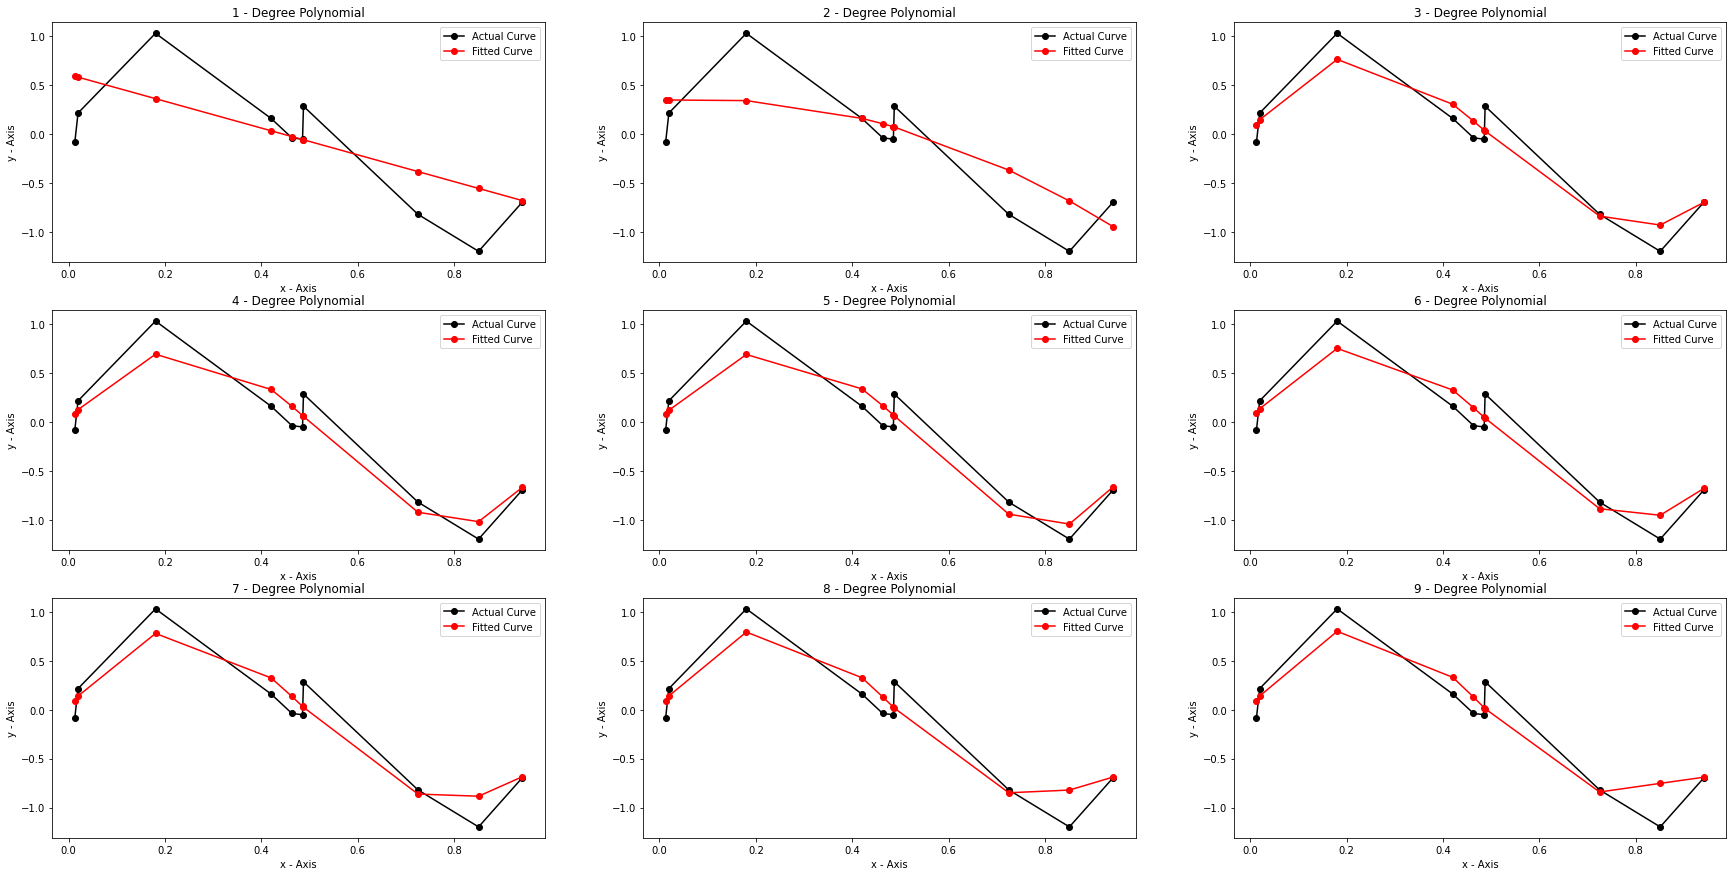

In [ ]:
plot_error_vs_dimension(data_dict_10)

**3. Experimenting with larger training set**

Repeat the above experiment with three other datasets having size 100, 1000 and 10,000 instances (each dataset generated similarly as described in Part 1a).
Draw the learning curve of how train and test error varies with increase in size of datasets (for 10, 100, 1000 and 10000 instances).

### ***Experiment with dataset having 100 data points***

In [ ]:
# Experiment with dataset of size 100

dataset = generate_dataset(100, sin2pix)
X = dataset['X']
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

data_dict_100 = fit_curves()

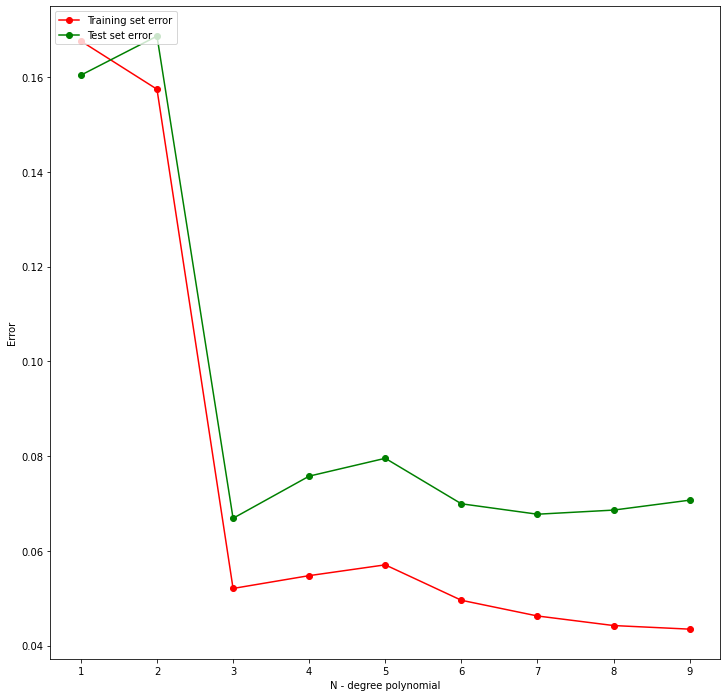

In [ ]:
# Plotting training and testing error for all 9 curves fit on dataset with 100 points

plot_fitted_curves(data_dict_100)

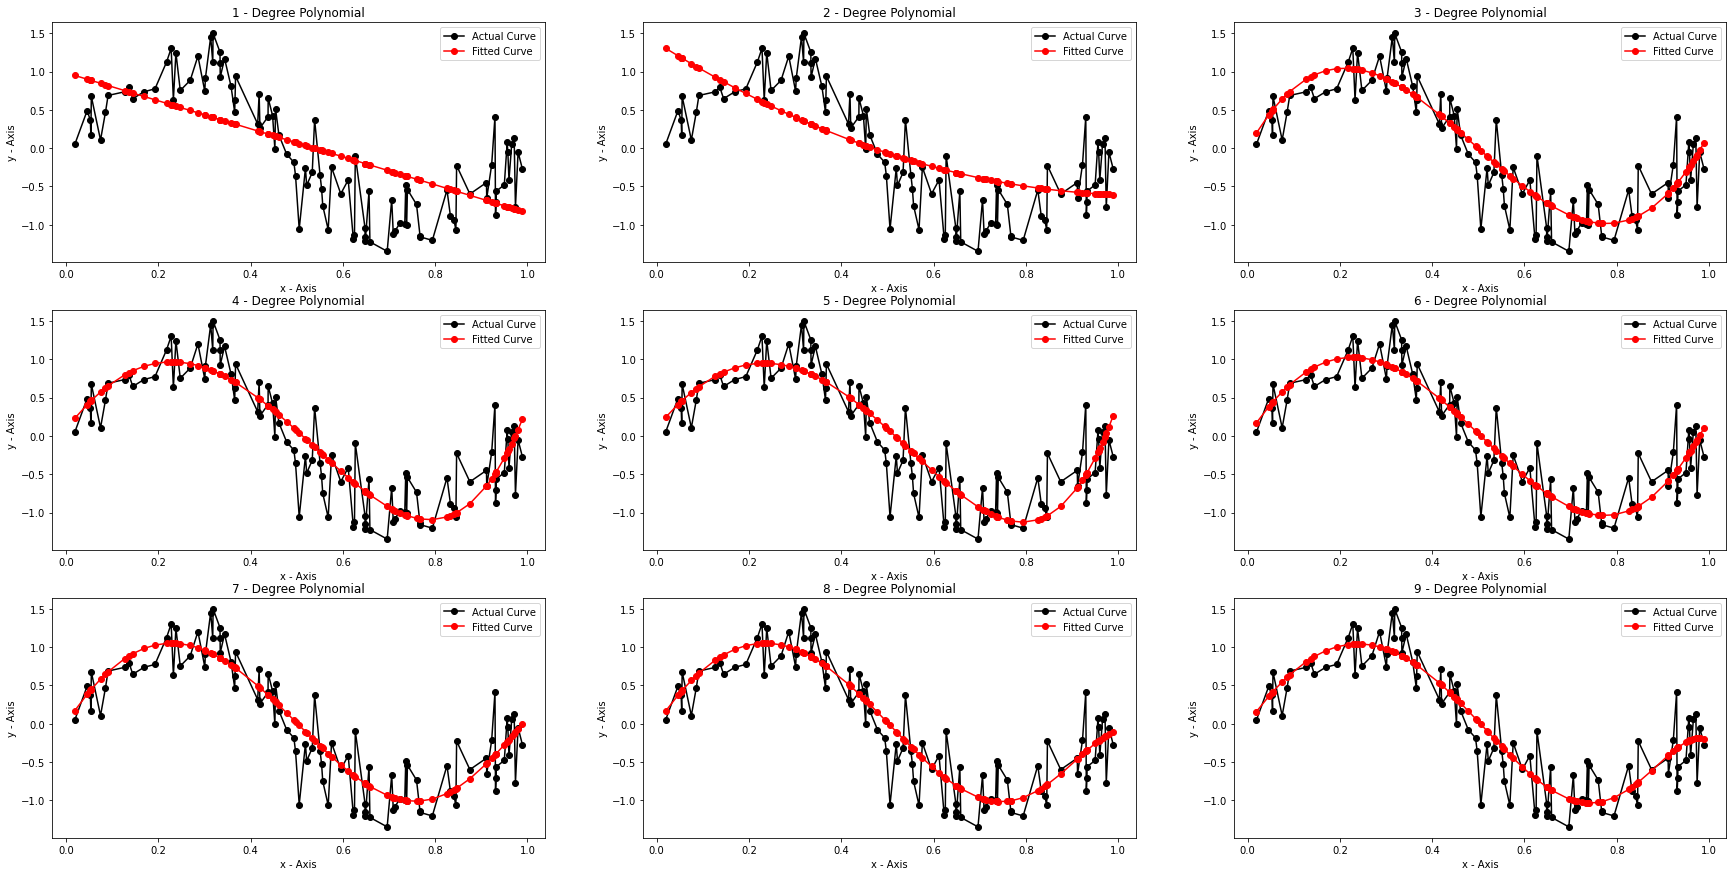

In [ ]:
# Plotting all 9 curves fit on dataset with 100 points

plot_error_vs_dimension(data_dict_100)

### ***Experiment with dataset having 1000 data points***

In [ ]:
# Experiment with dataset of size 1000

dataset = generate_dataset(1000, sin2pix)
X = dataset['X']
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

data_dict_1000 = fit_curves()

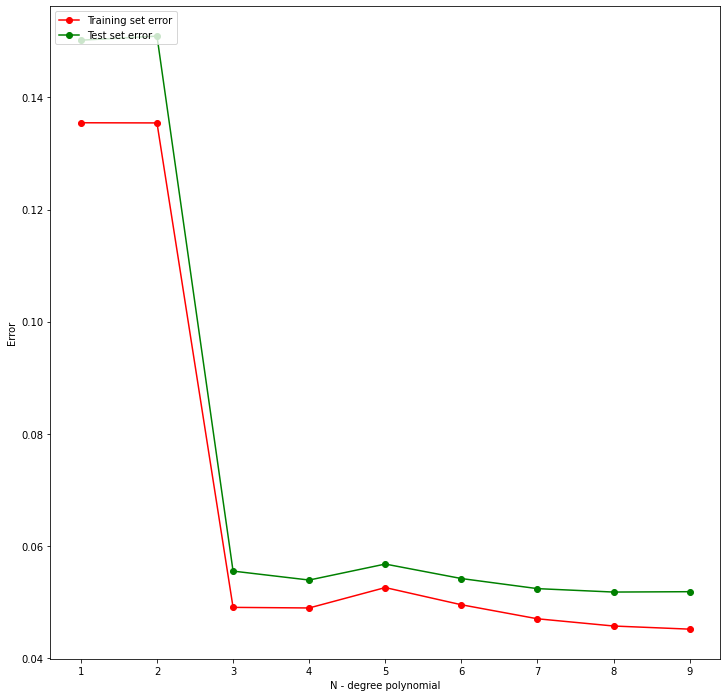

In [ ]:
# Plotting training and testing error for all 9 curves fit on dataset with 1000 points

plot_fitted_curves(data_dict_1000)

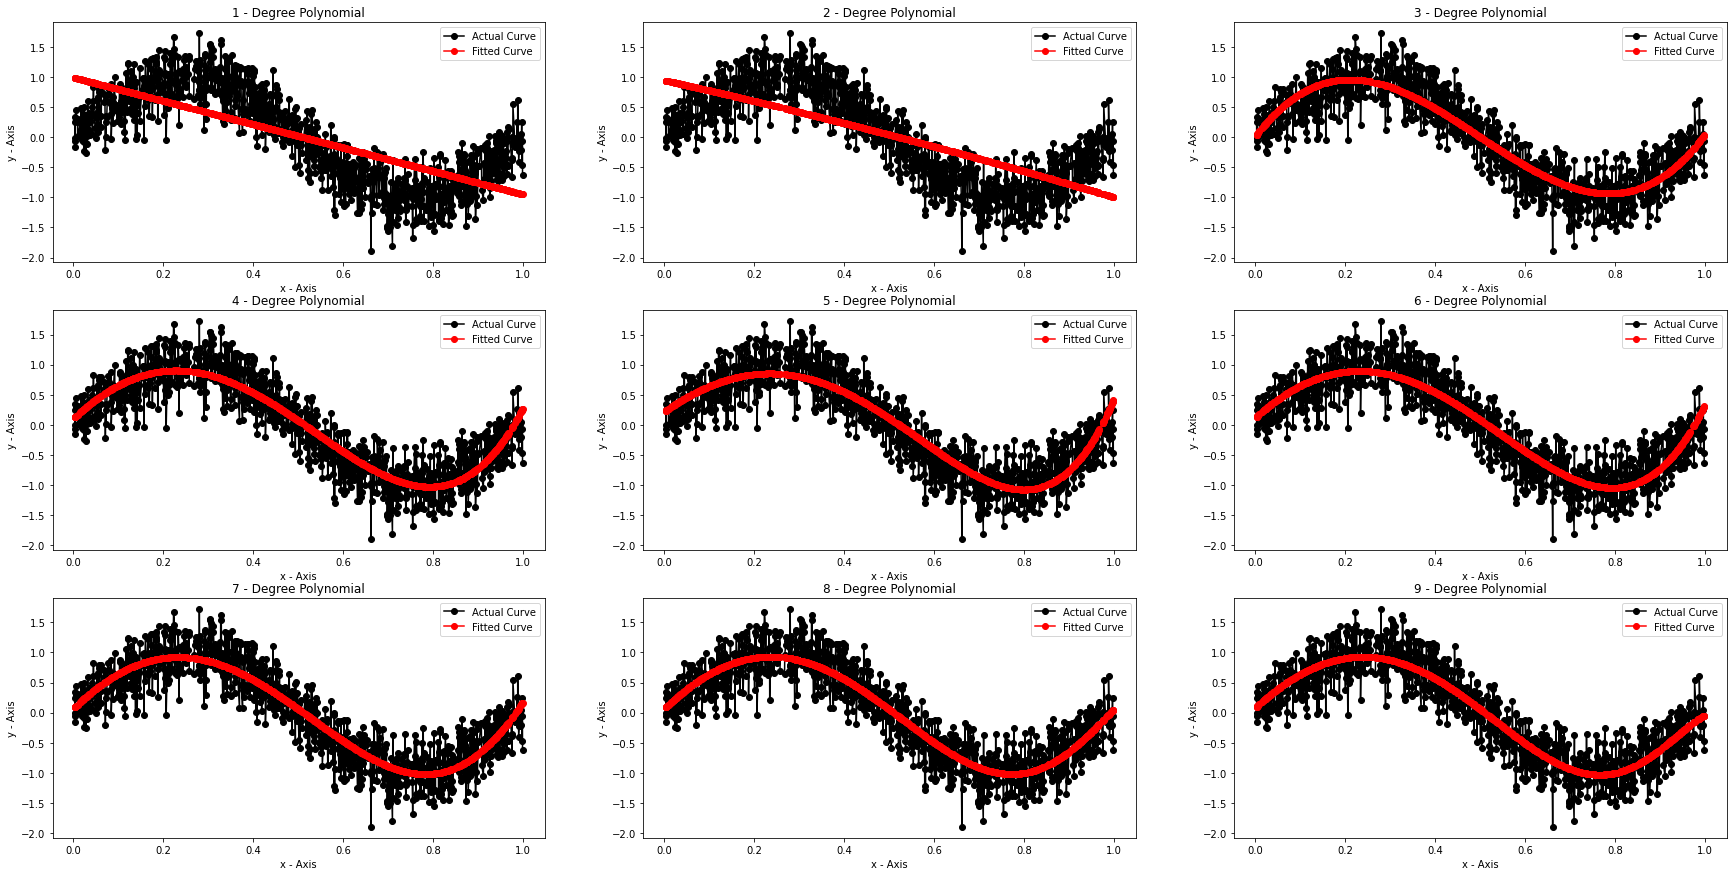

In [ ]:
# Plotting all 9 curves fit on dataset dataset with 1000 points

plot_error_vs_dimension(data_dict_1000)

### ***Experiment with dataset having 10000 data points***

In [ ]:
# Experiment with dataset of size 10000

dataset = generate_dataset(10000, sin2pix)
X = dataset['X']
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

data_dict_10000 = fit_curves()

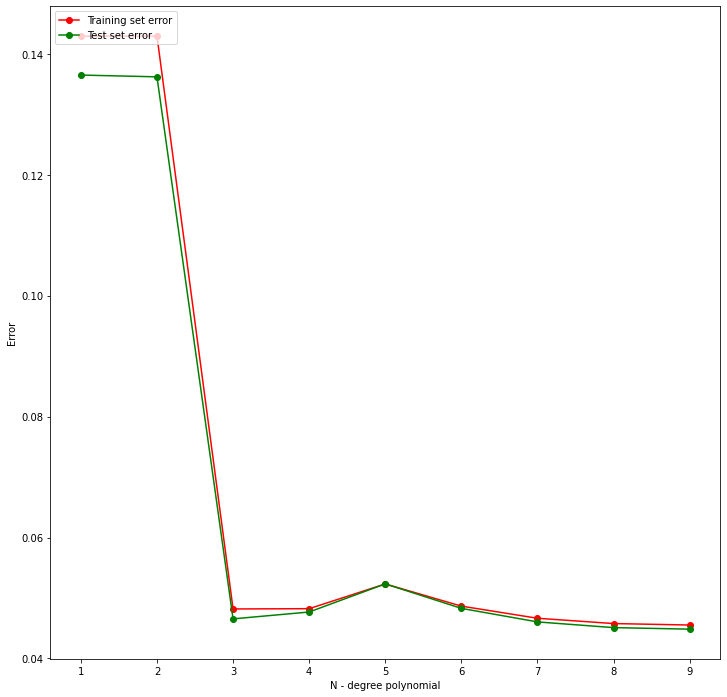

In [ ]:
# Plotting training and testing error for all 9 curves fit on dataset with 10000 points

plot_fitted_curves(data_dict_10000)

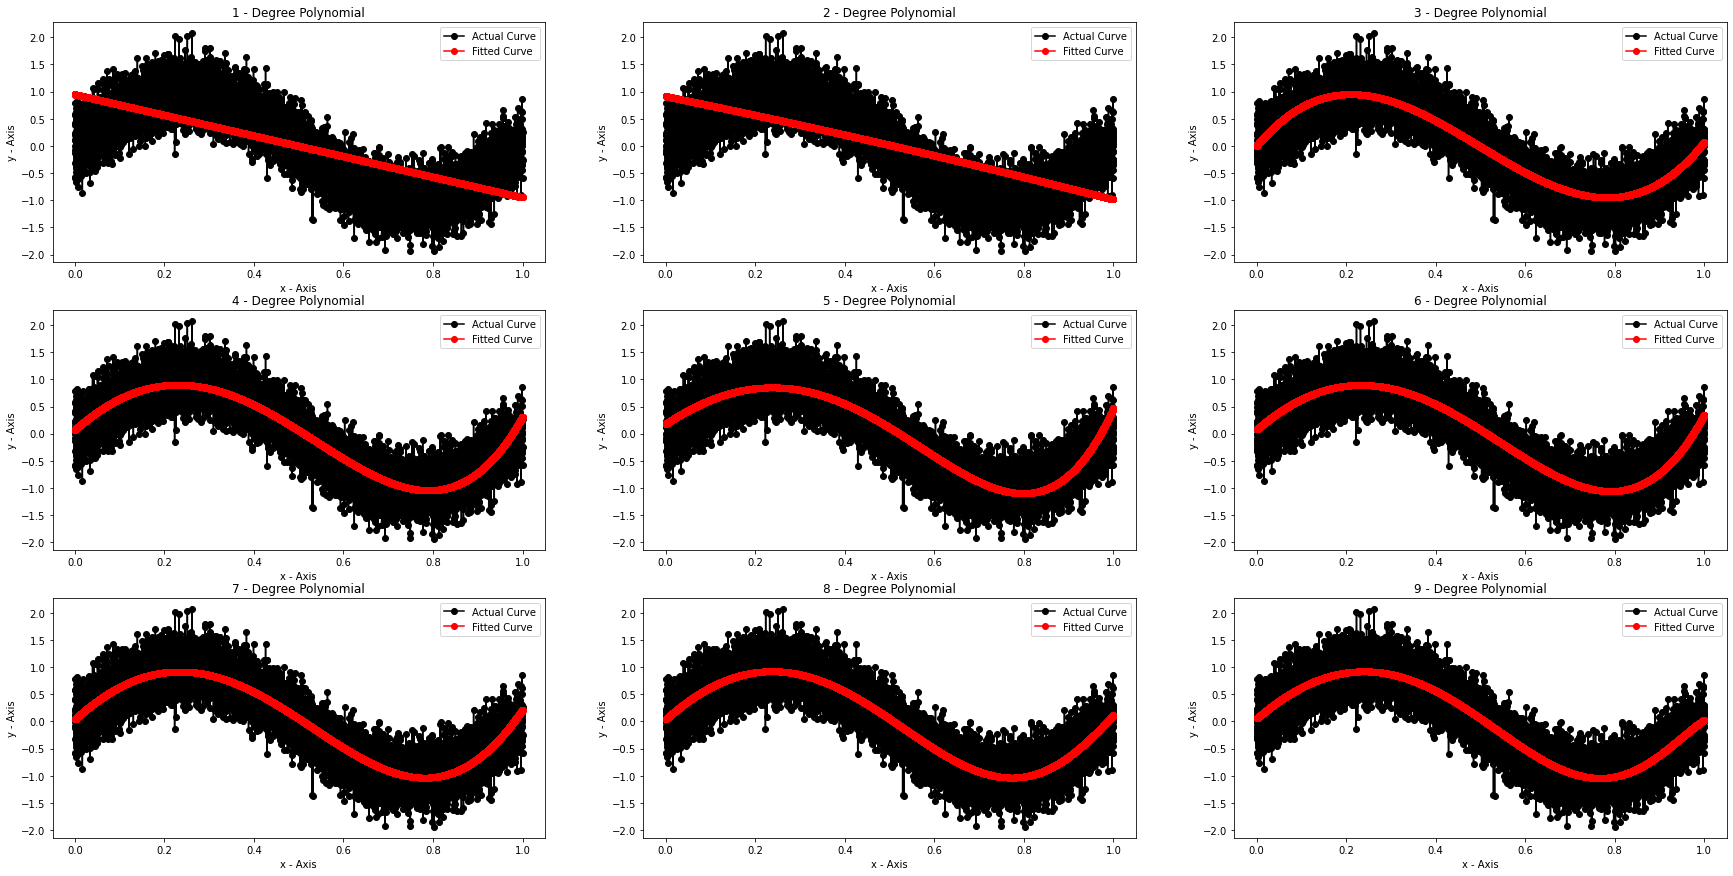

In [ ]:
# Plotting all 9 curves fit on dataset with 10000 points

plot_error_vs_dimension(data_dict_10000)

## Plotting the training snd testing error for different sizes of dataset for each curve.

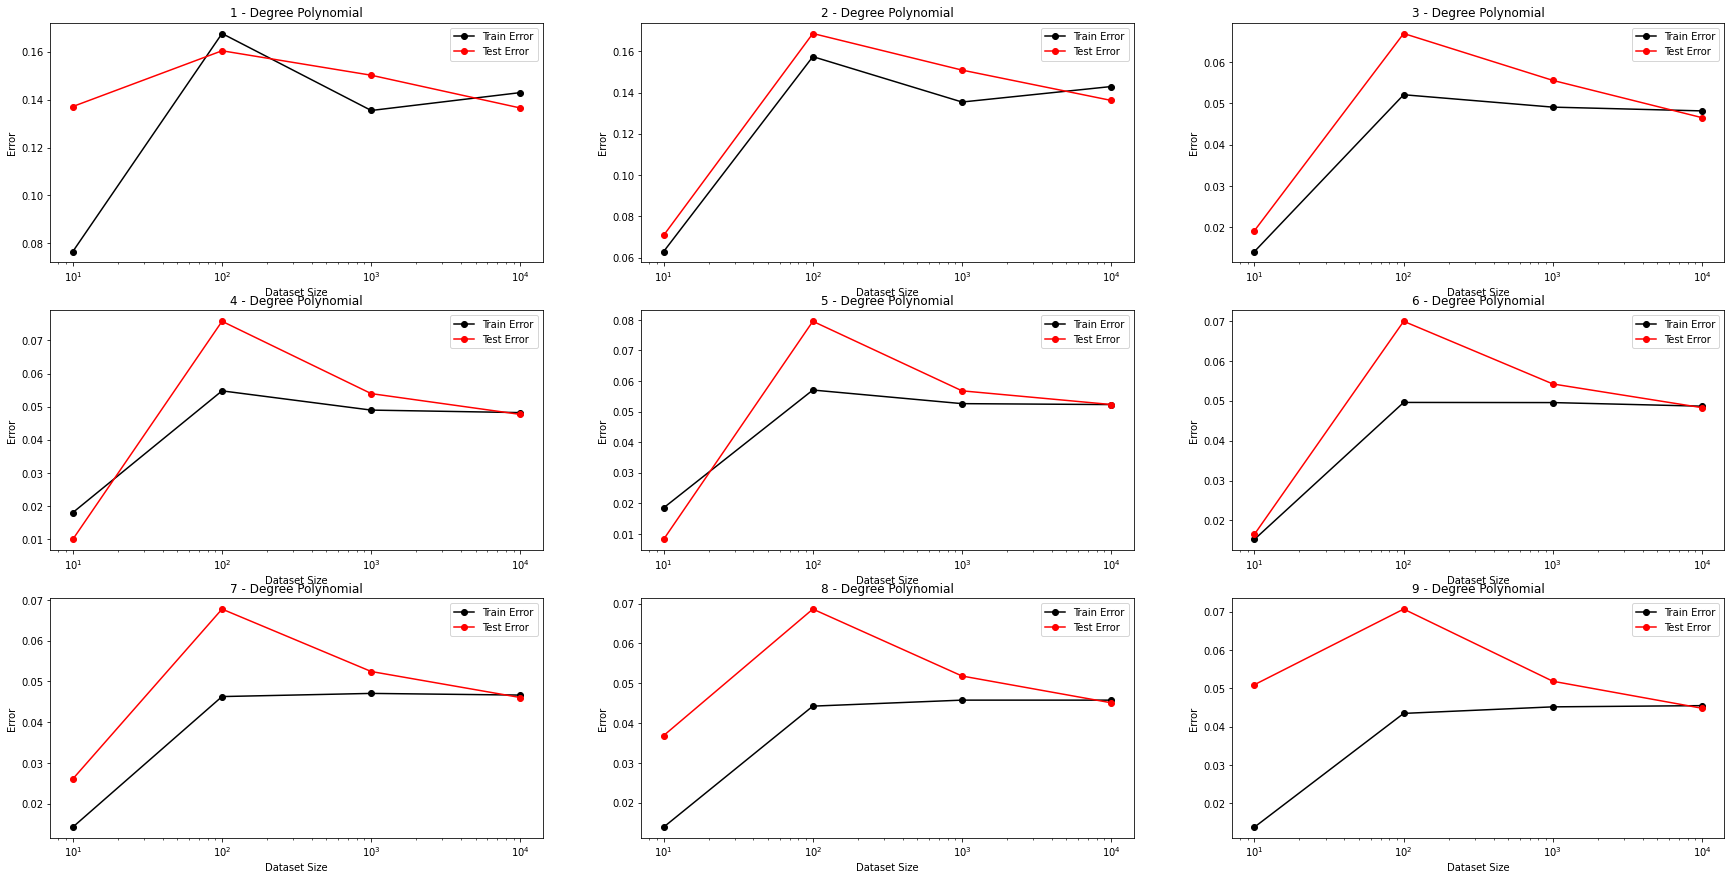

In [ ]:
# Training and test error vs size of dataset

cache = dict()

for i in range(1, 10):
  cache[f"train_err_{i}"] = list()
  cache[f"train_err_{i}"].append(data_dict_10['train_error'][i-1])
  cache[f"train_err_{i}"].append(data_dict_100['train_error'][i-1])
  cache[f"train_err_{i}"].append(data_dict_1000['train_error'][i-1])
  cache[f"train_err_{i}"].append(data_dict_10000['train_error'][i-1])

  cache[f"test_err_{i}"] = list()
  cache[f"test_err_{i}"].append(data_dict_10['test_error'][i-1])
  cache[f"test_err_{i}"].append(data_dict_100['test_error'][i-1])
  cache[f"test_err_{i}"].append(data_dict_1000['test_error'][i-1])
  cache[f"test_err_{i}"].append(data_dict_10000['test_error'][i-1])

figure = plt.figure(figsize=(30, 15))
axs = dict()

xax = [10, 100, 1000, 10000]

for i in range(1, 10):
  
  axs[f"ax_{i}"] = figure.add_subplot(3, 3, i, xlabel="Dataset Size", ylabel="Error", title=f"{i} - Degree Polynomial", xscale='log')
  axs[f"ax_{i}"].plot(xax, cache[f"train_err_{i}"], marker='o', c='k', label='Train Error')
  axs[f"ax_{i}"].plot(xax, cache[f"test_err_{i}"], marker='o', c='r', label='Test Error')
  axs[f"ax_{i}"].legend(loc=1)


## **Logistic Regression**

In [ ]:
class LogisticRegression():
  def __init__(self, p, learning_rate=1e-5):
    self._features = p
    self._bias = 1
    self._weights = np.random.uniform(size=(p, 1))
    self._learning_rate = learning_rate

  def __activation(self, z):
    return (1 + np.exp(-z)) ** -1
  
  def __J(self, X, y):
    h = self.predict(X)
    m = np.asarray(X).shape[0]
    J = (np.dot(-y.T, np.log(h))) - (np.dot((1-y.T), np.log(1-h)))
    return (-1 / m) * J

  def __gradients(self, X, y):
    error = np.reshape((self.predict(X) - y), newshape=(-1, 1))
    
    db = np.sum(error)
    dw = error * X
    dw = np.reshape(np.sum(dw, axis=0), newshape=(-1, 1))

    m = X.shape[0]
    return db/m, dw/m
  
  def __update(self, db, dw, X, y):
    J_prev = self.__J(X, y)
    self._bias -= self.
_learning_rate * db
    self._weights -= self._learning_rate * dw
    J = self.__J(X, y)
    return not -1e-5 < J - J_prev < 1e-5

  def fit(self, X, y):
    iter = 0
    db, dw = self.__gradients(X, y)
    while self.__update(db, dw, X, y):
      if iter > 50000:
        break
      db, dw = self.__gradients(X, y)


  def predict(self, X):
    array_1d = lambda x: np.reshape(x, newshape=(-1))

    if type(X).__name__ == 'list' or type(X).__name__ == 'int' or type(X).__name__ == 'float':
      X = np.array(X)

    if X.ndim == 0:
      if self._features > 1:
        raise (f"Number of features of sample must be {self._features}")
      else:
        return self.__activation(array_1d(np.dot(X, self._weights) + self._bias))

    elif X.ndim == 1:
      if X.shape[0] == self._features or X.ndim == self._features:
        return self.__activation(array_1d(self._bias + np.multiply(X, self._weights)))
      else:
        raise Exception(f"Number of features of sample must be {self.features}")

    elif X.ndim == 2:
      if X.shape[1] == self._features:
        return self.__activation(array_1d(np.dot(X, self._weights) + self._bias))
      else:
        raise Exception(f"Shape of input array must be (Number of samples, {self._features})")

    else:
      raise Exception(f"Too many dimensions in input array: {X.ndim}")

  def accuracy(self, X, y, threshold):
    predicted_class = lambda prob: 1 if prob > threshold else 0

    h = self.predict(X)
    m = X.shape[0]
    correctly_classified = 0

    for i in range(m):
      if predicted_class(h[i]) == y[i]:
        correctly_classified += 1

    return correctly_classified / m


1. Implement logistic regression over the breast cancer wisconsin dataset.

In [ ]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

In [ ]:
store = {
  'train_split': list(),
  'train_accuracy': list(),
  'test_accuracy': list()
  }

for i in range(1, 7):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=i/10)
  model = LogisticRegression(X.shape[1])
  model.fit(X_train, y_train)
  # print(i/10)
  store['train_split'].append(i * 10)
  store['train_accuracy'].append(model.accuracy(X_train, y_train, threshold=0.5))
  store['test_accuracy'].append(model.accuracy(X_test, y_test, threshold=0.5))

a. Compute training and testing accuracy on the table mentioned below by varying training samples (from 10% to 60%). Moreover, please save the table as a CSV file.

In [ ]:
import pandas as pd

df = pd.DataFrame(store, columns = ['train_split', 'train_accuracy', 'test_accuracy'])

df.to_csv('table.csv')
df.head(6)

,train_split,train_accuracy,test_accuracy
0,10,0.892857,0.914230
1,20,0.884956,0.916667
2,30,0.870588,0.877193
3,40,0.903084,0.900585
4,50,0.911972,0.898246
5,60,0.909091,0.885965
